<a href="https://colab.research.google.com/github/karvs1458-gif/Inteligencia-Artificial/blob/main/Multicapa/Flor_De_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris  #importa el dataset Iris
iris = load_iris()  #carga los datos en memoria

In [2]:
print(iris.keys()) #esta linea muestra qué partes contiene el conjunto de datos

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
#muestra la descripción completa del conjunto de datos
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
import pandas as pd #importamos la libreria pandas para crear un dataframe para verlo mejor de forma tabulada
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#nos muestra el numero de filas y columnas
iris_df.shape

(150, 4)

In [6]:
#definimos los  valores de "X" y "Y"
X = iris_df
y = pd.get_dummies(iris.target).values

In [7]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [10]:
#divide el conjunto de datos en dos partes: una para entrenar y otra para evaluarlo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [11]:
print(X_train.shape)  #tamaño del conjunto de entrenamiento
print(X_test.shape) #tamaño del conjunto de prueba

(120, 4)
(30, 4)


In [12]:
#celda para normalizar los datos antes del entranamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#define la arquitectura de una red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  #capa oculta
    Dense(32, activation='relu'), #segunda capa oculta
    Dense(3, activation='softmax'), #capa de salida
])

In [18]:
from tensorflow.keras.optimizers import Adam

#definimos nuestra tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)  #se crea una instancia del optimizador Adam, usando la tasa de aprendizaje
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
#entrenamos nuestro modelo
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,  #con 10 epocas
    validation_data=(X_test, y_test)
)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7010 - loss: 0.9353 - val_accuracy: 0.9000 - val_loss: 0.4719
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.4886 - val_accuracy: 0.9000 - val_loss: 0.2995
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4361 - val_accuracy: 0.9000 - val_loss: 0.2370
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8383 - loss: 0.2873 - val_accuracy: 0.9333 - val_loss: 0.2019
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2569 - val_accuracy: 0.9333 - val_loss: 0.1699
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9358 - loss: 0.1691 - val_accuracy: 0.9667 - val_loss: 0.1320
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.1812 - val_accuracy: 1.0000 - val_loss: 0.0830
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9496 - loss: 0.1425 - val_accuracy: 1.

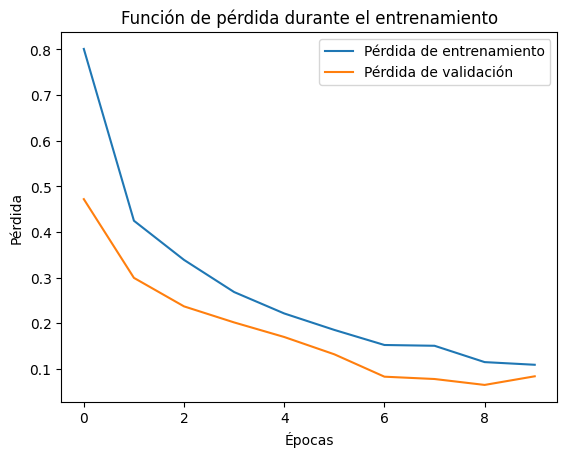

In [22]:
#graficamos nuestra funcion de perdida
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

In [23]:
#nos da la perdida y la presición que tiene nuestro modelo
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step - accuracy: 0.9667 - loss: 0.0838
Loss: 0.08384852856397629, Accuracy: 0.9666666388511658
